## CPE019 - Assignment 5.2: Build a Multilayer Perceptron Model


**Names:** SERRANO, Jio A.<br>
**Course and Section:** CPE019 - CPE32S3 <br>
**Date of Submission**: March 26, 2024<br>
**Instructor:** Engr. Roman Richard<br>


### Building and Applying Multilayer Perceptron Model

In this activity, building, applying, and evaluating a multilayer perceptron model (MLP) with the use of Keras library will be explored.

### About the Dataset

The dataset to be used is obtained from the UC Irvine Machine Learning Repository. The dataset entitled "Maternal Health Risk", contains data collected from different hospitals, community clinics, and maternal health cares from the rural areas of Bangladesh through IoT-based risk monitoring system [1].

The dataset has six features namely Age, Systolic Blood Pressure (SystolicBP), Diastolic BP (DiastolicBP), Blood Sugar (BS), Body Temperature (BodyTemp), HeartRate, and RiskLevel, and 1,013 instances.

The dataset is often associated with classification tasks which are also where multilayer perceptron model shines.

Link of the dataset: https://archive.ics.uci.edu/dataset/863/maternal+health+risk

### **Maternal Health Risk**

---


**Dataset Characteristics** <br>
Multivariate

**Subject Area** <br>
Health and Medicine

**Associated Tasks** <br>
Classification

**Feature Type** <br>
Real, Integer

**Number of Instances** <br>
1013

**Number of Features** <br>
6


---


**DOI** <br>
10.24432/C5DP5D


### Objectives

This activity aims to:
* Develop a multilayer perceptron model that can be used to predict maternal health risk based on factors like systolic blood pressure, diastolic blood pressure, blood sugar, body temperature, and heart rate.

* Apply the developed model to a training data set.

* Evaluate the model based on different evaluation methods.

### Importing the Dataset

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
# Loading the CSV file

import pandas as pd
import numpy as np

path = "/content/drive/MyDrive/EmTech Assignment/Maternal Health Risk Data Set.csv"
HealthRiskDF = pd.read_csv(path)


In [88]:
#Verifying if the csv file was successfully loaded

HealthRiskDF.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


**Remarks**: Based on the result from the `head()` method, the csv file was successfully loaded into the dataframe, `HealthRiskDF`.

### Verification and Pre-Processing of Data

In this step, we will further scrutinize the dataset by performing exploratory tests and pre-processing.

#### Checking for Null Values

We can use the `info()` method to check if there are any null values in the columns of our datasets. Null values can affect the performance of the model if left untreated.

In [89]:
HealthRiskDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


**Remarks**: Using the `info()` method allows us to check the data types of the features in the dataset. From the above result, we can see that there are no null objects in the columns of our dataset. Additionally, we can see that `RiskLevel` is an `object`. MLP, just like any other machine learning models, typically require numerical values for its inputs, hence, we need to convert this object value into numerical ones, a process known as *label encoding* [2], [3].


<br>

---

[2] “Multi-Layer Perceptron Neural Network using Python – Machine Learning Geek,” Machinelearninggeek.com, Apr. 23, 2021. https://machinelearninggeek.com/multi-layer-perceptron-neural-network-using-python/ (accessed Mar. 25, 2024).
‌

[3] S. Jaiswal, “Multilayer Perceptrons in Machine Learning: A Comprehensive Guide,” Datacamp.com, Feb. 07, 2024. https://www.datacamp.com/tutorial/multilayer-perceptrons-in-machine-learning (accessed Mar. 25, 2024).


---


‌

#### Label Encoding

As part of data pre-processing, we will set the `RiskLevel` column values into the following: `low risk` = 0, `mid risk` = 1, `high risk` = 2.

In [90]:
# Using the replace() method

HealthRiskDF['RiskLevel'].replace(to_replace=['low risk', 'mid risk', 'high risk'], value=[0, 1, 2], inplace=True)

# Use head() to verify if changes were applied

HealthRiskDF.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,2
1,35,140,90,13.00,98.0,70,2
2,29,90,70,8.00,100.0,80,2
3,30,140,85,7.00,98.0,70,2
4,35,120,60,6.10,98.0,76,0
5,23,140,80,7.01,98.0,70,2
6,23,130,70,7.01,98.0,78,1
7,35,85,60,11.00,102.0,86,2
8,32,120,90,6.90,98.0,70,1
9,42,130,80,18.00,98.0,70,2


**Remarks**: From the results above generated by the `head()` method, we can see that the values in the `RiskLevel` column were updated.

In [91]:
HealthRiskDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


**Remarks**: Upon using the `info()` method, the data type in the `RiskLevel` column is now `int64`.  

#### Identifying Input Features and Target Variables

Input features will be the predictors of the target variable/s. For this specific dataset, these are the columns `Age`, `SystolicBP`, `DiastolicBP`, `BS`, `BodyTemp`, and `HeartRate` as the input features. These are stored in the variable, `X`. The target variable on the other hand will be `RiskLevel` and is stored in the variable, `y`.

Our aim is to create a multilayer perceptron model that will utilize the said input features for classifying the risk level value (0, 1, or 2, low to high risk).

In this step, we will perform feature importance to check and verify if the said input features bear significance to our target variable using the `RandomForestRegressor` function.

Feature: 0, Score: 0.09094
Feature: 1, Score: 0.19897
Feature: 2, Score: 0.04877
Feature: 3, Score: 0.54452
Feature: 4, Score: 0.06536
Feature: 5, Score: 0.05144


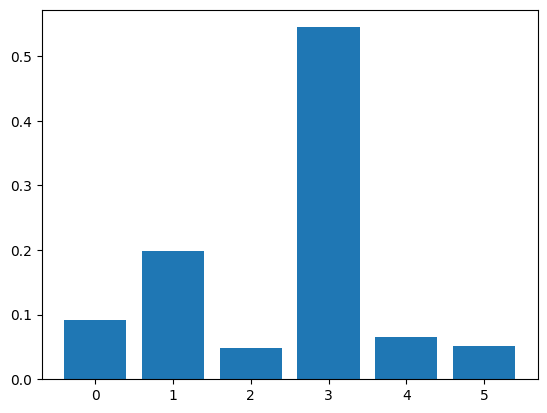

In [96]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

X = HealthRiskDF.drop(columns = ['RiskLevel']) # Input features
y = HealthRiskDF['RiskLevel'] # target variable
singleX = HealthRiskDF['BS'] # single feature

input = HealthRiskDF[list(X)]

# Create object for RandomForestRegressor()
model = RandomForestRegressor()

# Fit model
model.fit(input, y)

# Get feature importance
imp = model.feature_importances_

for i, v in enumerate(imp):
  print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(imp))], imp)
plt.show()

**Remarks**: From the above results, we can see that most of the features have low significance in relation to the target variable. Hence, we can expect later on that the model may *not* perform that well. Feature 3 or the `BloodSugar` feature has the highest score among all the features.

This could be explained by the small amount of data in the dataset which is only around 1013.

In [97]:
X.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76


In [98]:
y.head()

0    2
1    2
2    2
3    2
4    0
Name: RiskLevel, dtype: int64

**Remarks**: From the above codes, we have successfully stored our input features and target variable in their respective variables. We also verified this by using the `head()` method.

#### Checking for Outliers

Outliers are data that are located far away from the majority of the data [8]. We have to check our dataset for the existence of these values as they can affect the performance of the model in terms of accuracy and reliability [8]. We can check for outliers using boxplots.

<br>

---

[8] Tahera Firdose, “Understanding Outliers: Impact, Detection, and Remedies,” Medium, Jun. 2023. https://tahera-firdose.medium.com/understanding-outliers-impact-detection-and-remedies-ea2192174477 (accessed Mar. 26, 2024).
‌

---

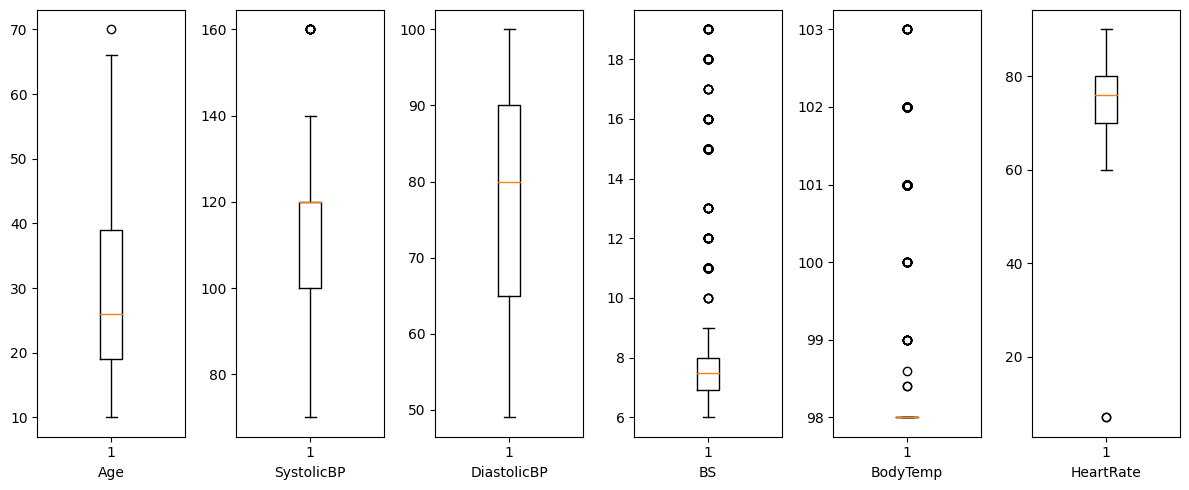

In [278]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 6, figsize=(12, 5))
features = HealthRiskDF.columns

for i in range(6):
  axs[i].boxplot(HealthRiskDF[features[i]])
  axs[i].set_xlabel(f"{features[i]}")


plt.tight_layout()
plt.show()

**Remarks**: Based on the above graph, we can see that there are no outliers present in the DiastolicBP feature, however, outliers are present in the other features, marked as the points outside the boxplot whiskers.

In [279]:
# Create function that will accept the dataframe, the column name to be cleaned, and threshold
# Return the cleaned dataframe

def remove_outliers_iqr(df, column_name, thresh=1.5):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - (thresh * IQR)
  upper_bound = Q3 + (thresh * IQR)

  return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

In [280]:
# Remove outliers

dataDF = HealthRiskDF.copy()
features = dataDF.columns

for i in range(6):
  dataDF = remove_outliers_iqr(dataDF, f'{features[i]}')

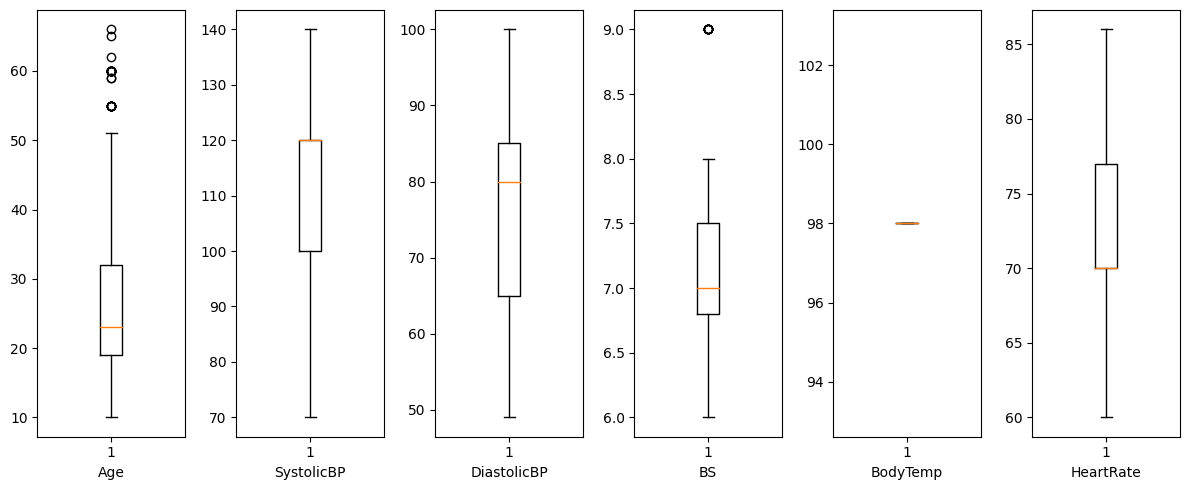

In [281]:
# Check if outliers are removed

fig, axs = plt.subplots(1, 6, figsize=(12, 5))
features = HealthRiskDF.columns

for i in range(6):
  axs[i].boxplot(dataDF[features[i]])
  axs[i].set_xlabel(f"{features[i]}")


plt.tight_layout()
plt.show()

In [282]:
dataDF.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,600.000000,600.000000,600.000000,600.000000,600.0,600.00000,600.000000
mean,27.898333,111.705000,75.070000,7.158850,98.0,72.51000,0.523333
std,12.041997,16.981812,13.253346,0.571617,0.0,5.94661,0.645614
min,10.000000,70.000000,49.000000,6.000000,98.0,60.00000,0.000000
25%,19.000000,100.000000,65.000000,6.800000,98.0,70.00000,0.000000
50%,23.000000,120.000000,80.000000,7.000000,98.0,70.00000,0.000000
75%,32.000000,120.000000,85.000000,7.500000,98.0,77.00000,1.000000
max,66.000000,140.000000,100.000000,9.000000,98.0,86.00000,2.000000


**Remarks**: After removing the outliers, the number of data count was significantly reduced. Checking the new boxplot graphs, we can see that the outliers were significantly reduced as well.

#### Checking Data Imbalance

Data imbalance occurs when there is a significant disparity in terms of the distribution of the class labels [6]. In classification tasks like what we are doing in this activity, data imbalance, especially when the dataset is small, can result to poor evaluation results for both training and testing [6].

<br>

---
[6] S. Allwright, “What is imbalanced data? Simply explained,” Stephen Allwright, Aug. 09, 2022. https://stephenallwright.com/imbalanced-data/ (accessed Mar. 25, 2024).
‌

---

In [283]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
import pandas as pd

target_counts = Counter(dataDF['RiskLevel'])  # Replace 'target_column' with your actual target column name
print(target_counts)

Counter({0: 336, 1: 214, 2: 50})


**Remarks**: Based on the distribution of the labels, we can see that there is a disparity between the classes, especially in the 0 (low risk) and 2 (high risk) classes. Hence, we will perform data balancing to compensate for this disparity.

In [284]:
ros = RandomOverSampler(random_state=25)

X_resampled, y_resampled = ros.fit_resample(dataDF.drop('RiskLevel', axis=1), dataDF['RiskLevel'])

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(dataDF.drop('RiskLevel', axis=1), dataDF['RiskLevel'])

print(Counter(y_resampled))

Counter({2: 336, 0: 336, 1: 336})


**Remarks**: Since the minimum in the class of `RiskLevel` in our dataset is 82, and this number is too low for our model, we performed data balancing through oversampling. Random oversampling can be used on multi-class dataset that has minority [9]. It is easy and fast to implement which can be used for complex datasets [9].

Here we used the `RandomOverSampler` from `imblearn.over_sampling` to randomly select and copy data entries from the minority class/es, in our case, from class 1 and 2, to match with the majority class which is class 0 [10].
<br>

---
[9] J. Brownlee, “Random Oversampling and Undersampling for Imbalanced Classification - MachineLearningMastery.com,” MachineLearningMastery.com, Jan. 14, 2020. https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/ (accessed Mar. 26, 2024).
‌

[10] “RandomOverSampler — Version 0.13.0.dev0,” Imbalanced-learn.org, 2014. https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.RandomOverSampler.html (accessed Mar. 26, 2024).
‌

---

### Splitting the Dataset

Before proceeding, we will split the data into two different portions—*training* and *testing* data. This will be used to train and evaluate the model later on. It is noted that the dataframe we are splitting are the selected columns we have defined in the earlier parts, `X` which contains the input features, and `y` which contains the target variable.

The training dataset will be used when training the model and the testing dataset will remain unseen by the model until testing. The ratio of the division will be 8:2, 80% of the data will be used for training and 20% will be used for testing.

In [285]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2,
                                                    random_state = 20)

### Data Scaling

This is done when the standard deviation of the values are greater than 1 [4]. To do this, we will use the `StandardScaler` module from the `sklearn` library.

<br>

---

[4] J. Brownlee, “How to use Data Scaling Improve Deep Learning Model Stability and Performance - MachineLearningMastery.com,” MachineLearningMastery.com, Feb. 03, 2019. https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/ (accessed Mar. 25, 2024).
‌

---

In [286]:
# Bring the features to the same range (Data Scaling)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Multilayer Perceptron Model

After performing all the data cleaning and preprocessing steps above, we can now build our multilayer perceptron model using Tensorflow.

In [287]:
# Importing modules

import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation
import matplotlib.pyplot as plt

### Building the Model

In [326]:
# Form the Input, hidden, and output layers.

model = Sequential([
	# dense layer 1
	Dense(128, activation='relu'),
	# dense layer 2
	Dense(64, activation='relu'),
	# output layer
	Dense(6, activation='softmax'),
])

tf.random.set_seed(10)

# Compile the model

model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])

# Fit the model

history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=100, validation_split=0.2)

Epoch 1/20
7/7 [==============================] - 1s 56ms/step - loss: 1.6800 - accuracy: 0.3758 - val_loss: 1.5446 - val_accuracy: 0.6111
Epoch 2/20
7/7 [==============================] - 0s 9ms/step - loss: 1.4530 - accuracy: 0.5916 - val_loss: 1.3308 - val_accuracy: 0.6296
Epoch 3/20
7/7 [==============================] - 0s 10ms/step - loss: 1.2533 - accuracy: 0.6102 - val_loss: 1.1461 - val_accuracy: 0.6296
Epoch 4/20
7/7 [==============================] - 0s 13ms/step - loss: 1.0792 - accuracy: 0.6196 - val_loss: 0.9863 - val_accuracy: 0.6235
Epoch 5/20
7/7 [==============================] - 0s 12ms/step - loss: 0.9369 - accuracy: 0.6429 - val_loss: 0.8634 - val_accuracy: 0.6481
Epoch 6/20
7/7 [==============================] - 0s 13ms/step - loss: 0.8318 - accuracy: 0.6693 - val_loss: 0.7834 - val_accuracy: 0.6667
Epoch 7/20
7/7 [==============================] - 0s 13ms/step - loss: 0.7615 - accuracy: 0.6724 - val_loss: 0.7292 - val_accuracy: 0.6790
Epoch 8/20
7/7 [============

From the `compile` method, the optimizer used was `adam`, the `sparse_categorical_crossentropy` was used for the `losses` parameter. According to [7], this is used when there are two or more labels or classes that are represented by integers. Lastly, for `metrics`, `accuracy` was used.

From the model training results, there were instances that the accuracy values are fluctuating from high back to low and then high again. This could be resolved by adjusting the epochs by decreasing it to the point when the accuracy or loss values stopped increasing or decreasing.

<br>

---
[7] K. Team, “Keras documentation: Probabilistic losses,” Keras.io, 2018. https://keras.io/api/losses/probabilistic_losses/#categorical_crossentropy-function (accessed Mar. 25, 2024).

---
‌

In [323]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0, 0.5, 'loss')

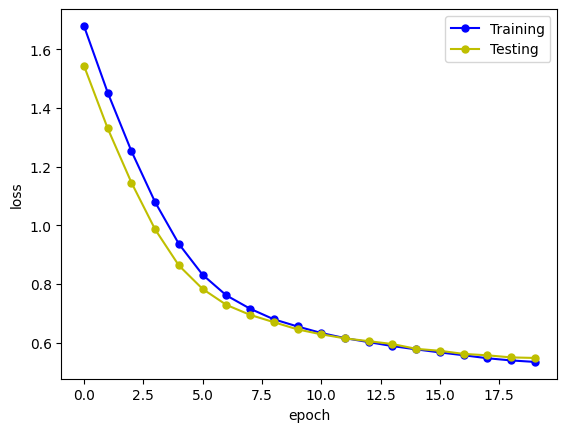

In [327]:
plt.plot(history.history['loss'], "bo-", markersize = 5) #blue
plt.plot(history.history['val_loss'], "yo-", markersize = 5) #yellow
plt.legend(["Training", "Testing"])
plt.xlabel("epoch")
plt.ylabel("loss")

**Remarks**: From the graph above, it can be observed that the testing and training have comparable results. We can see at the end of the graph that the testing begins to slightly diverge away from the training graph.

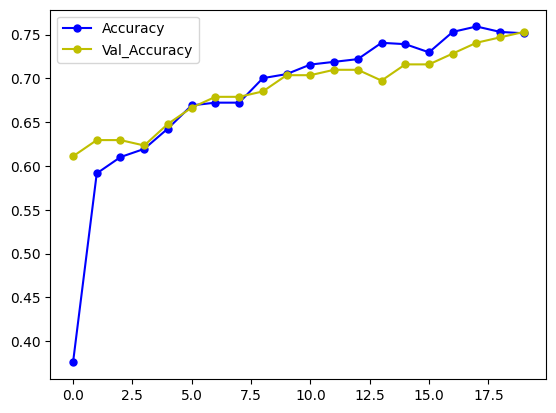

In [328]:
plt.plot(history.history['accuracy'], "bo-", markersize = 5) #blue
plt.plot(history.history['val_accuracy'], "yo-", markersize = 5) #yellow
plt.legend(["Accuracy", "Val_Accuracy"])

**Remarks**: The graph above shows that there is a significant difference in terms of the accuracy and val_accuracy and no regular pattern can be seen from the resulting graph.

In [329]:
# Find the accuracy of the model

results = model.evaluate(X_test_scaled, y_test, verbose = 1)
print('test loss, test acc:', results)


7/7 [==============================] - 0s 2ms/step - loss: 0.5813 - accuracy: 0.7030
test loss, test acc: [0.5813086628913879, 0.7029703259468079]


**Remarks**: From the result of the `evaluate` function above, the loss obtained by the model is around 58.13% and the accuracy is 70.30%, these values are considered bad values and could be improved by considering other factors such as increasing the dataset since the dataset that I have used only has about 330 data after all the pre-processing techniques done.

### Summary, Conclusions, and Lessons Learned



This activity allowed us to create and train our own multilayer perceptron model for the first time. Doing the activity has taught me the following:

* *Creating and training a model is an iterative process*. The whole process involves me going through the data pre-processing and cleaning over and over again to check if the model will perform significantly better after alterations in the data.

* *Data pre-prcoessing and cleaning are very essential steps in model building*. In the activity, we have performed multiple data pre-processing such as checking for null values, checking and eliminating outliers, balancing the data, performing feature importance tests, and among others. These steps have significantly affected the performance of the model.

* *Research is a must*. All throughout the activity, I have referenced a lot of materials that explain why some steps are necessary, why these values are produced, and what changes should I do to improve the model. Researching these things have enlightened me about deep learning models and how to create and optimize one.

Overall, although the accuracy of the model I have created is not up to standard, low if I may say, this activity has given me a lot of valuable insights on how I can go about in creating and training my own multilayer perceptron model in the future.